In [1]:
## Average nerve trajectory
# Finds and plots the average trajectory of the brachial nerves, constructed by a vector from the root of the nerve to the center of the process. Trajectories are colored by the septum of exit. 
# Cassady S. Olson 

import os
import sys
import imagej
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from nerveAnalysisFunctions import rootTip, translateNerves, getFiles, unitVector1, mag2d
plt.ion


ij = imagej.init(['sc.fiji:fiji', 'org.morphonets:SNT'], mode = "headless")

from scyjava import jimport 
PointInImage = jimport('sc.fiji.snt.util.PointInImage')
Tree = jimport('sc.fiji.snt.Tree')
TreeStatistics = jimport('sc.fiji.snt.analysis.TreeStatistics')


print("loaded")

loaded


In [2]:
# Set Data Path 
mainPath = r"/Users/ragsdalelab/Documents/Segmentation_NerveAnalysis/data/TipAlphaTub"
subFolders = [r"/aboral", r"/central"]



In [3]:
# Get root and average tip for each nerve
# Average Tip is defined as the center of all the points constructing the nerve 
roots = []
tips = []

for folder in range(len(subFolders)):
    thisFolder = getFiles(mainPath + subFolders[folder])
    [thisRoot, thisTip] = rootTip(thisFolder, mainPath + subFolders[folder] + "/", 'n')
    roots.append(thisRoot)
    tips.append(thisTip)

    



In [4]:
# Translate Root-Tip vector such that (x, y) of the root is (0,0)
transRoots = []
transTips = []
keepSortIdx = []

for this in range(len(roots)):
    thisRoot = roots[this]
    thisTip = tips[this]

    [transRoot, transTip] = translateNerves(thisRoot, thisTip)
    
    sortIdx = np.argsort(transRoot[:,2])
    keepSortIdx.append(sortIdx)
    transRoots.append(transRoot[sortIdx])
    transTips.append(transTip[sortIdx])
   
   

In [5]:
# Normalize vector 
normTips = [] 
totalTips = np.concatenate([transTips[0], transTips[1]])
magTips = mag2d(totalTips)
normValTips = np.max(magTips)
for this in range(len(transTips)):
    thisTip = transTips[this]
    thisTipNormed = unitVector1(thisTip, normValTips) 
    normTips.append(thisTipNormed)


In [6]:
# Septa colors: manually selected
cmap = ['palevioletred','crimson', 'tab:orange', 'gold', 'limegreen', 'dodgerblue', 'mediumorchid']#get_cmap(35, 'jet')
aboralColorIdx =np.array([0, 1, 2, 2, 4, 6, 6])
centralColorIdx = np.array([0, 1, 3, 3, 3, 4, 4, 5, 6])


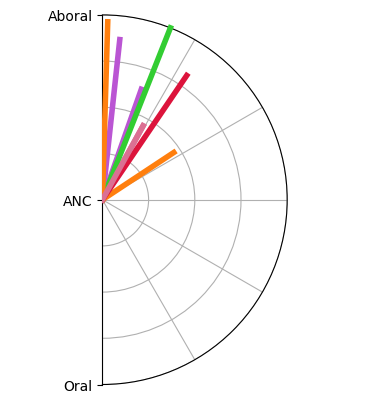

In [7]:
# Aboral Nerve Avg Trajectory Plot 
fig, axp = plt.subplots(subplot_kw={'projection': 'polar'})
ax = fig.add_axes(axp.get_position().bounds, polar=False, frameon=False)

for ii in range(len(transRoots[0])):
    # Construct Root-Tip vector
    rootTip = np.stack((transRoots[0][-ii,:], normTips[0][-ii,:]))
    # Select Color Idx
    idx = aboralColorIdx[-ii]
    # Plot
    ax.plot(rootTip[:,0], rootTip[:,1], c = cmap[idx], lw = 4, alpha = 1)


    # Set Plot parameters 
    ax.set_aspect('equal')
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    axp.set_rlim(0,1)
    axp.set_thetamin(-90)
    axp.set_thetamax(90)
    axp.set_rticks([0.25, 0.5, 0.75, 1])
    ax.set_xticks([])
    axp.set_yticklabels([])
    axp.set_xticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([-1,1])
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels(['Oral','ANC', 'Aboral'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
# Ensure index 0 is plotted on top
rootTip = np.stack((transRoots[0][0,:], normTips[0][0,:]))
ax.plot(rootTip[:,0], rootTip[:,1], c = cmap[aboralColorIdx[0]], lw = 4, alpha = 1)



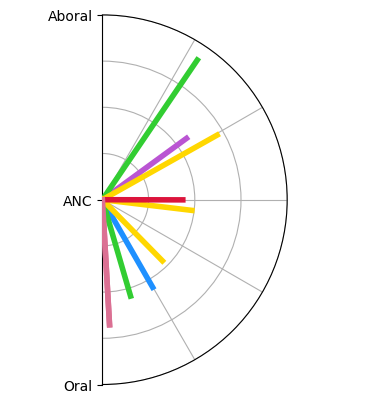

In [8]:
# Central Nerve Avg Trajectory Plot 
fig, axp = plt.subplots(subplot_kw={'projection': 'polar'})
ax = fig.add_axes(ax.get_position().bounds, polar=False, frameon=False)

for ii in range(len(transRoots[1])):
    # Construct Root-Tip Vector
    rootTip = np.stack((transRoots[1][-ii,:], normTips[1][-ii,:]))
    # Select color idx
    idx = centralColorIdx[-ii]
    # Plot
    ax.plot(rootTip[:,0], rootTip[:,1], c = cmap[idx], lw = 4)
    

    # Set Plot Parameters 
    ax.set_aspect('equal')
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    axp.set_rlim(0,1)
    axp.set_thetamin(-90)
    axp.set_thetamax(90)
    axp.set_rticks([0.25, 0.5, 0.75, 1])
    ax.set_xticks([])
    axp.set_yticklabels([])
    axp.set_xticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels(['Oral','ANC', 'Aboral'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Ensure index 0 is plotted on top  
rootTip = np.stack((transRoots[1][0,:], normTips[1][0,:]))
ax.plot(rootTip[:,0], rootTip[:,1], c = cmap[centralColorIdx[0]], lw = 4, alpha = 1)
